In [3]:
from lender_main import *

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
%load_ext autoreload
%autoreload 2
pd.options.display.max_rows = 999

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
df = read_full_data()

In [6]:
df.shape

(2945384, 105)

In [7]:
df = create_lenders_labels(df)

In [8]:
df.shape

(2945384, 109)

In [9]:
normal = df[~df['dollar_outliers?']][~df['team_outliers?']][~df['comments_outliers?']][~df['dollar_zeros?']]

In [10]:
normal.shape

(1017355, 109)

In [11]:
ndf, X = feature_engineer(normal) #with loan preferences

In [12]:
from model import *

# with loan preference: pca + kmeans

In [13]:
re_pca, imp_f = PCA_reduce(X,3)

#0 Principle Component top 5 contributors are: [ 6  9 17 81  5]
#1 Principle Component top 5 contributors are: [28 10 18  6 23]
#2 Principle Component top 5 contributors are: [22  1  0 97 82]
Reduced X shape: (1017355, 3)
Explained variance: [9.90667789 8.40760622 4.23020321]
Explained variance ratio: [0.03095834 0.02627374 0.01321937]
Explained variance ratio accumulated: [0.03095834 0.05723208 0.07045145]


In [14]:
re_pca_df = pd.DataFrame(re_pca)

In [15]:
re_pca_df.to_csv('pca_3d_normal.csv',index=False)

In [14]:
counter = print_imp_features(ndf,imp_f)

Counter({'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL': 2, 'FIRST_YEAR_DEPOSIT_TOTAL': 1, 'FIRST_YEAR_DEPOSIT_OCCASION_NUM': 1, 'FIRST_TIME_DEPOSITOR_REPORTING_CATEGORY_none': 1, 'LIFETIME_DEPOSIT_TOTAL': 1, 'NUM_DISTINCT_COUNTRIES_LENT_TO': 1, 'FIRST_YEAR_LOAN_PURCHASE_TOTAL': 1, 'FIRST_YEAR_LOAN_PURCHASE_OCCASION_NUM': 1, 'NUM_TEAM_LOANS': 1, 'NUM_TEAM_MEMBERSHIPS': 1, 'IS_CORPORATE_CAMPAIGN_USER': 1, 'ACCOUNT_AGE_MONTHS': 1, 'FIRST_BASKET_CATEGORY_Kiva Card Redeemer': 1, 'FIRST_TRANSACTION_REFERRAL_giftcard': 1})


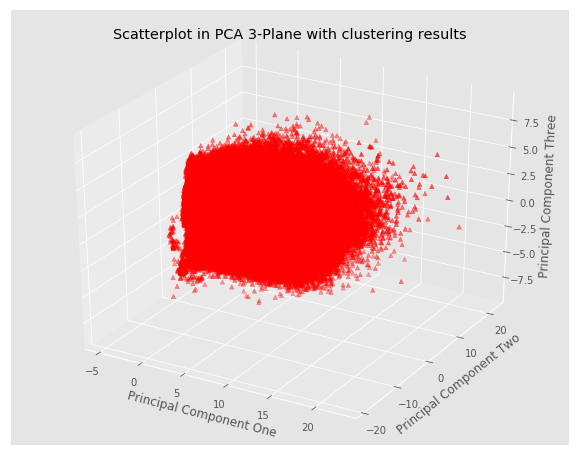

In [15]:
matplotlib_3D_X_reduced(re_pca)

In [ ]:
y, assigned_cluster = kmeans_cluster(re_pca,6)

In [16]:
# y, assigned_cluster = kmeans_cluster(re_pca,10)

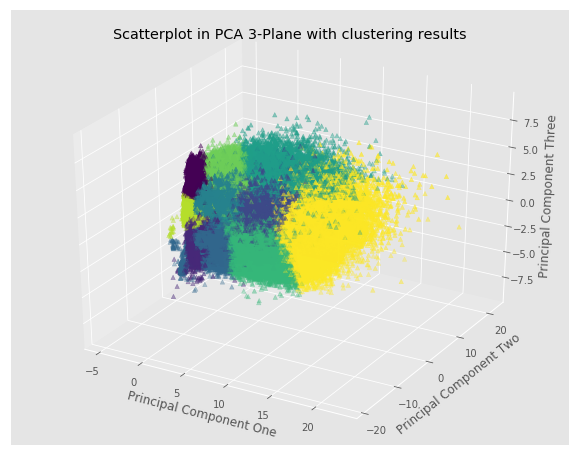

In [18]:
plot_3D_kmeans(re_pca,y)

In [19]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
silhouette_avg = silhouette_score(re_pca, assigned_cluster)

## without loan preference

In [194]:
re_X, imp_t = PCA_reduce(X,3)

#0 Principle Component top 5 contributors are: [ 5 14  9 17 36]
#1 Principle Component top 5 contributors are: [ 32 303  15  10  18]
#2 Principle Component top 5 contributors are: [ 1  4 45 52 37]
Reduced X shape: (1017355, 3)
Explained variance: [9.10892193 4.6657714  3.84525684]
Explained variance ratio: [0.03312332 0.01696642 0.01398274]
Explained variance ratio accumulated: [0.03312332 0.05008974 0.06407248]


In [198]:
counter = print_imp_features(ls,imp_t)

Counter({'LIFETIME_DEPOSIT_TOTAL': 1, 'FIRST_DAY_DEPOSIT_TOTAL': 1, 'FIRST_YEAR_DEPOSIT_TOTAL': 1, 'FIRST_YEAR_DEPOSIT_OCCASION_NUM': 1, 'FIRST_TIME_DEPOSITOR_REPORTING_CATEGORY_none': 1, 'last_login_today': 1, 'FIRST_LOAN_REGION_nan': 1, 'FIRST_DAY_LOAN_PURCHASE_TOTAL': 1, 'FIRST_YEAR_LOAN_PURCHASE_TOTAL': 1, 'FIRST_YEAR_LOAN_PURCHASE_OCCASION_NUM': 1, 'IS_CORPORATE_CAMPAIGN_USER': 1, 'LIFETIME_DONATION_TOTAL': 1, 'FIRST_TRANSACTION_REFERRAL_unknown': 1, 'FIRST_BASKET_CATEGORY_Kiva Card Redeemer': 1, 'FIRST_TRANSACTION_REFERRAL_giftcard': 1})


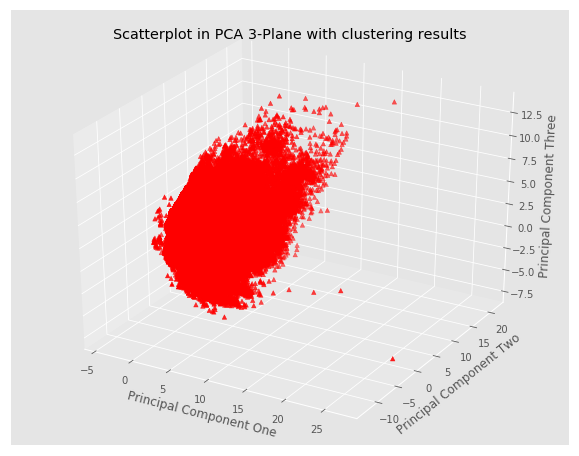

In [195]:
matplotlib_3D_X_reduced(re_X)

In [199]:
y, assigned_cluster = kmeans_cluster(re_X,10)

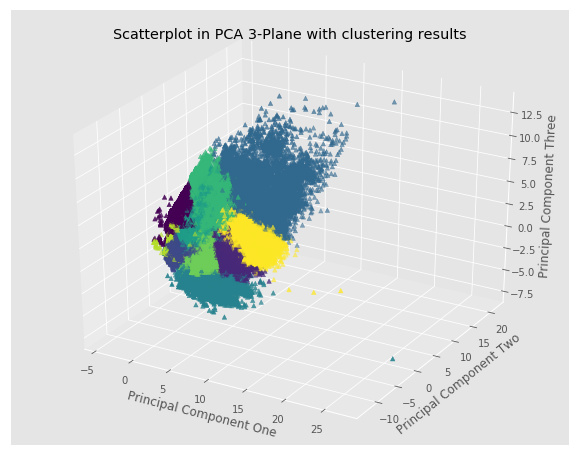

In [200]:
plot_3D_kmeans(re_X,y)

In [202]:
np.argmax(re_X[:,0])

188798

In [204]:
ls.iloc[188798,:]

ACCOUNT_AGE_MONTHS                                                      124
IS_CORPORATE_CAMPAIGN_USER                                                0
IS_FREE_TRIAL_USER                                                        0
IS_INACTIVE_CREDIT_DONOR                                              False
LIFETIME_DONATION_TOTAL                                                30.1
LIFETIME_DEPOSIT_TOTAL                                                 30.1
LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL                                   0.01
LIFETIME_PROXY_LOAN_PURCHASE_TOTAL                                        0
LIFETIME_LENDER_WEIGHTED_AVERAGE_LOAN_TERM                               14
FIRST_YEAR_DEPOSIT_TOTAL                                               23.2
FIRST_YEAR_LOAN_PURCHASE_TOTAL                                            0
FIRST_YEAR_DONATION_TOTAL                                                 0
FIRST_YEAR_EMAIL_REFERRAL_DONATION_TOTAL                                  0
FIRST_YEAR_E